## NumPy and Pandas Bootcamp

Welcome back to another HODP bootcamp! This week, we'll be introducing **NumPy** and **Pandas**, two of the most popular
Python libraries used in data science.

## Python Review
Let's review some basic Python before we jump into numpy. Below are some practice problems for you to solve. The problems
focus on lists, dictionaries, and functions because these are some of the most important concepts when using Python for
data science!


1. Define a function ```reverse()``` which takes in a list and returns the reverse of the list - so the last element is
now the first, the second to last element is now the second, etc.

In [1]:
def reverse(lst):
    # Using a loop:
    # newlist = []
    # for elem in lst:
    #     newlist.insert(0, elem)
    # return newlist
    
    # Using list slicing
    return lst[::-1]

2. Define a function ```remove_dupes()``` that removes all duplicate elements of the list. You may choose to preserve the
list's order if you like.

In [2]:
def remove_dupes(lst):
    dupes = set()
    return_lst = []
    for elem in list:
        if elem not in dupes:
            dupes.add(elem)
            return_lst.append(elem)
    return return_lst

    # Without preserving order (assumes elements in lst are not mutable):
    # return list(set(lst))

3. Define a function ```count()``` that takes in a list and returns a dictionary with keys being the unique values in the
list and respective values being the number of times they appear in the list. For example, given the list
```["a", "a", "b", "c", "c"]```, your function should return the dictionary ```{"a": 2, "b": 1, "c": 2}```.

In [3]:
def count(lst):
    count_dict = {}
    for elem in lst:
        # If the element is not yet in the dictionary, add it with a count of 1
        if elem not in count_dict:
            count_dict[elem] = 1
        # If the element is already in the dictionary, increment the count by 1
        else:
            count_dict[elem] += 1
    return count_dict

Now, let's jump right in with numpy!

## Getting Started

Before we can use numpy and pandas, we must first import the libraries into our notebook. You should already have numpy
and pandas installed, but if you're having any trouble, call one of the bootcamp leaders and we'll help sort it out
for you.

In [4]:
import numpy as np
import pandas as pd

## Python vs. NumPy
Python lists are flexible and they are a powerful tool in many situations. However, bugs are sometimes tough to find
and for loops to manipulate data can be slow. On the other hand, NumPy arrays have fixed types, and operations on NumPy
arrays are much faster when compared to using lists.

What do we mean by numpy arrays having fixed types? Consider the following Python list:

In [5]:
lst = ["Asher", "Sahana", 1.0, 2]
print(lst)

['Asher', 'Sahana', 1.0, 2]


```lst``` contains strings, floats, and integers. But once we set it as a numpy array, we notice a subtle change:

In [6]:
np_lst = np.array(lst)
print(np_lst)

['Asher' 'Sahana' '1.0' '2']


Every element is now a string! So numpy arrays can only consist of a single data type. While this may seem like a hindrance,
forcing fixed types is why numpy operations execute much faster than equivalent code in Python. You probably won't notice the
difference in speed when working with small lists and arrays, but with large datasets the difference is very significant.

## Creating NumPy arrays
First, we can use ``np.array`` to create arrays from Python lists:

In [7]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

If types do not match, NumPy will up-cast if possible. Here, integers are up-cast to floats:

In [8]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

You can also explicitly set the type by providing a ```dtype``` argument:

In [9]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Numpy has a bunch of handy built-in functions to generate arrays. For example, we can create an array of length 10
filled with zeros.

In [10]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The ```np.arange()``` function works in a very similar way to Python's ```range()``` function. How would you create an
array of the first 10 even integers, starting from 0?

In [11]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

We can also create matrices by specifying the number of rows and columns as a tuple. The ```np.ones()``` function
simply initializes every value in the matrix to 1.

In [12]:
np.ones((2, 3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1]])

You can access elements of an array by using slice notation:

In [13]:
array = np.arange(9)
array[1:4] # returns an array from the first index (inclusive) to the fourth index (exclusive)

array([1, 2, 3])

You can access elements of a matrix in a similar fashion by using two slice expressions - the first determines which row(s)
to extract, and the second determines which column(s).

In [14]:
matrix = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
# We can get the value 2 by specifying the first row (0th index) and second column (1st index)
matrix[0, 1]

2

How could you extract the second row? Hint: the slice operator ```:``` without any arguments returns the entire array.
So a call like ```matrix[:, :]``` would return all rows and all columns - the entire matrix itself!

In [15]:
matrix[1, :]

array([4, 5, 6])

How could you extract the numbers 7 and 8?

In [16]:
matrix[2, :2]

array([7, 8])

As a rule of thumb, don't reinvent the wheel. Google if a function already exists that does what you want!

## NumPy and Data Analysis
Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the __mean__ and __standard deviation__, which allow you to summarize the
"typical" values in a dataset, but other aggregates are useful as well (e.g. the sum, product, median, minimum and maximum,
quantiles, etc.).

Numpy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.
Let's create a large array of random numbers from 0 to 1 and take the sum using Python's function and numpy's.

In [17]:
big_array = np.random.rand(1000000)

# -n 10 means run it 10 times
%timeit -n 10 sum(big_array)
%timeit -n 10 np.sum(big_array)

222 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
688 µs ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can see that numpy's ```sum()``` function is much faster.

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [18]:
M = np.random.rand(3, 4)
print(M)

[[0.71149966 0.98388877 0.14908883 0.21163579]
 [0.21224921 0.42415666 0.96689982 0.17197704]
 [0.30929644 0.86465987 0.54711802 0.57844837]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [19]:
M.min()

0.14908883201248468

But if you wanted to get the minimum of each column, you can specify which **axis** you want your function to act upon:
- axis = 0 means your function will act on all rows for each column 
- axis = 1 means your function will act on all columns for each row

So we want to set ```axis=0``` because for each column, we want to take the minimum over all rows.

In [20]:
# minimum of each column
M.min(axis=0)

array([0.21224921, 0.42415666, 0.14908883, 0.17197704])

How could you get the maximum of each row?

In [21]:
M.max(axis=1)

array([0.98388877, 0.96689982, 0.86465987])

Dot product of [1,3,4,5, 6,6,1,1,1,3,3,5,3,31,1,3,5,54,4,313,1,1] and [5,3,9,5, 6,6,1,1,1,-30,3,16,3,31,1,-134,5,54,4,31,15,51]?

In [3]:
np.dot([1,3,4,5, 6,6,1,1,1,3,3,5,3,31,1,3,5,54,4,313,1,1],[5,3,9,5, 6,6,1,1,1,-30,3,16,3,31,1,-134,5,54,4,31,15,51])

13444

Broadcasting: (3,2) with (2,)

In [6]:
A = np.array([[1,10], [15, 20], [25, 50]])
x = np.array([5, 100])
A + x

array([[  6, 110],
       [ 20, 120],
       [ 30, 150]])

### Other functions
Most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked
by the special floating-point ``NaN`` value.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |
| ``np.concatenate``| N/A                 | Concatenate arrays (without manual copying!)  |

## Pandas
Pandas is another useful library for data analysis. While NumPy is powerful for mathematically-heavy analysis, it relies
on __arrays__ of specific data types. Pandas mainly uses two data structures - `Series` and `DataFrames` - that are organized
similarly to a spreadsheet. It combines the functionality of Python and NumPy with the ease of use of Google Sheets or Excel.

We can create DataFrames from Python lists and dictionaries:

In [22]:
states = pd.DataFrame({'State': ['Massachusetts','Ohio','Alaska','California','Arkansas'],
                       'Population Rank': [15, 7, 48, 1, 33]})
print(states)

           State  Population Rank
0  Massachusetts               15
1           Ohio                7
2         Alaska               48
3     California                1
4       Arkansas               33


However, this is often not very useful. Instead, we will usually read in data from another file.

## Activity: House Rankings
It's your turn to work with an example dataset! We'll be using pandas to analyze freshman house rankings prior to 2019
Housing Day. We will:
1. Read in the data from an external file
2. Manipulate the data and make it more convenient to use
3. Analyze and gather statistics about the data
4. Plot our results

If you don't remember everything that we discussed about pandas, don't worry! You can find a reference on
[HODP Docs](https://hodp-docs.netlify.app/docs/numpy-pandas), and also feel free to ask any questions you may have!

### Reading in the data
First, let's read in the data from the file ```house_rankings_2019.csv``` into a DataFrame called ```rankings``` and print
out the first five rows.

In [23]:
rankings = pd.read_csv("house_rankings_2019.csv")
rankings.head()

,House,1,2,3,4,5,6,7,8,9,10,11,12
0,Adams,7,14,19,19,30,20,19,19,24,7,12,13
1,Cabot,0,3,5,3,7,1,9,8,15,39,52,61
2,Dunster,11,22,45,29,16,25,17,14,10,4,7,3
3,Pforzheimer,3,6,7,6,9,11,8,17,26,61,35,14
4,Winthrop,27,91,23,19,12,7,4,8,3,3,1,5


Since each row consists of all the votes for a single house, let's make the index be the name of each house instead of the
default numerical index. Try to modify the existing DataFrame instead of creating a new one. Hint: set ```inplace``` as
```True``` when you're changing the index.

In [24]:
rankings.set_index("House", inplace=True)

### Manipulating the data
We can easily extract certain data from our DataFrame. How could you get the number of first place votes for each House?

In [25]:
rankings.loc[:, "1"]
# or rankings.iloc[:, 0]

House
Adams            7
Cabot            0
Dunster         11
Pforzheimer      3
Winthrop        27
Kirkland         5
Quincy           5
Lowell         118
Mather           9
Eliot           15
Leverett         3
Currier          0
Name: 1, dtype: int64

Similarly, how could you get the distribution of votes for Lowell?

In [26]:
rankings.loc["Lowell", :]
# or rankings.iloc[7, :]

1     118
2      28
3      19
4      12
5       6
6      10
7       4
8       2
9       3
10      1
11      0
12      0
Name: Lowell, dtype: int64

We can also rename data labels pretty easily:

In [27]:
rankings.rename(index = {'Pforzheimer':'Pfoho'})

,1,2,3,4,5,6,7,8,9,10,11,12
House,,,,,,,,,,,,
Adams,7,14,19,19,30,20,19,19,24,7,12,13
Cabot,0,3,5,3,7,1,9,8,15,39,52,61
Dunster,11,22,45,29,16,25,17,14,10,4,7,3
Pfoho,3,6,7,6,9,11,8,17,26,61,35,14
Winthrop,27,91,23,19,12,7,4,8,3,3,1,5
Kirkland,5,5,11,23,20,30,25,28,20,9,12,15
Quincy,5,8,26,29,30,28,27,22,13,5,5,5
Lowell,118,28,19,12,6,10,4,2,3,1,0,0
Mather,9,6,5,16,19,8,19,24,45,21,8,23


### Analyzing the data
We can use Pandas to answer some questions we might have about the data. For example, how can we get the total number of
students that filled out the survey?

In [28]:
# There are many solutions; summing along any row or column will work
num = rankings.sum(axis=1)[0]
print(num)

203


Which house was the most popular? The least popular? Hint: the ```idxmax()``` function returns the index of the (first)
maximum value. Likewise for ```idxmin()```. You may need to break ties.

In [29]:
print(rankings.iloc[:, 0].idxmax())
# We used most last place votes as metric for least popular, which was Cabot.
# Currier could also be least popular if metric was least first place votes, with tiebreaker being least second place votes, etc.
print(rankings.iloc[:, 11].idxmax())

Lowell
Cabot


We can sort by popularity too!

In [30]:
rankings.sort_values(by='1',ascending=False)

,1,2,3,4,5,6,7,8,9,10,11,12
House,,,,,,,,,,,,
Lowell,118,28,19,12,6,10,4,2,3,1,0,0
Winthrop,27,91,23,19,12,7,4,8,3,3,1,5
Eliot,15,12,28,32,28,24,21,17,8,8,8,2
Dunster,11,22,45,29,16,25,17,14,10,4,7,3
Mather,9,6,5,16,19,8,19,24,45,21,8,23
Adams,7,14,19,19,30,20,19,19,24,7,12,13
Kirkland,5,5,11,23,20,30,25,28,20,9,12,15
Quincy,5,8,26,29,30,28,27,22,13,5,5,5
Pforzheimer,3,6,7,6,9,11,8,17,26,61,35,14


Let's extract the column of first place votes for each house again, but this time, let's change the data from the
number of students to the percentage of total students. Hint: given a DataFrame ```df```, numerical expressions involving ```df```
will be applied to every value in the DataFrame. For example, ```df * 2``` returns a DataFrame with all its values doubled.

In [31]:
rankings.iloc[:, 0] / num * 100

House
Adams           3.448276
Cabot           0.000000
Dunster         5.418719
Pforzheimer     1.477833
Winthrop       13.300493
Kirkland        2.463054
Quincy          2.463054
Lowell         58.128079
Mather          4.433498
Eliot           7.389163
Leverett        1.477833
Currier         0.000000
Name: 1, dtype: float64

Finally, let's find the average ranking for each house. This will require a weighted average. For example, if a house had
25 first place votes, 25 second place votes, and 50 third place votes, the average rating would be
$\frac{(25 * 1) + (25 * 2) + (50 * 3)}{100} = 2.25$.

In [32]:
weighted_rankings = rankings.copy()
for i in range(12):
    weighted_rankings.iloc[:, i] = rankings.iloc[:, i] * (i + 1)
avg_rankings = weighted_rankings.sum(axis=1) / num
avg_rankings


House
Adams           6.389163
Cabot          10.000000
Dunster         4.975369
Pforzheimer     8.669951
Winthrop        3.330049
Kirkland        6.901478
Quincy          5.812808
Lowell          2.216749
Mather          7.620690
Eliot           5.330049
Leverett        6.822660
Currier         9.931034
dtype: float64

Let's sort the average rankings to see what we have:

In [33]:
avg_rankings.sort_values()

House
Lowell          2.216749
Winthrop        3.330049
Dunster         4.975369
Eliot           5.330049
Quincy          5.812808
Adams           6.389163
Leverett        6.822660
Kirkland        6.901478
Mather          7.620690
Pforzheimer     8.669951
Currier         9.931034
Cabot          10.000000
dtype: float64

Would you look at that! The three most recently renovated houses are at the top, while the Quad houses are at the bottom
of the list. It certainly doesn't look like a coincidence, but we can't be certain until we perform some statistical tests.
You'll learn how to do that in an upcoming bootcamp.

The data we have right now is nice and all, but it would be even better if we could summarize our data visually. We can
use another library **matplotlib** to create some rudimentary figures:

In [34]:
import matplotlib

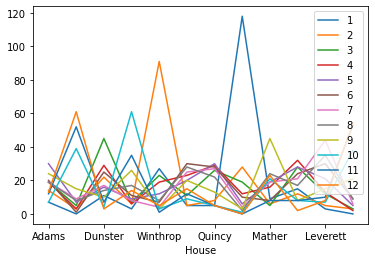

In [35]:
rankings.plot()

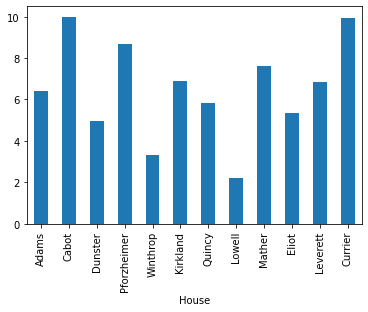

In [36]:
avg_rankings.plot.bar()

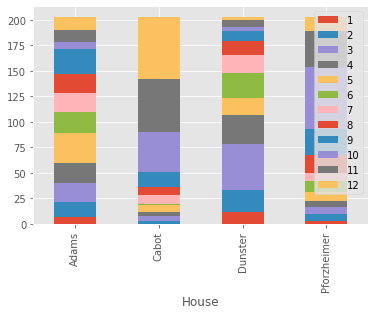

In [37]:
matplotlib.style.use('ggplot')
rankings[0:4].plot.bar(stacked=True);

There will also be bootcamps on data visualization, so stay tuned for those as well!